In [1]:
# Style Similarity

In [2]:
# Import libraries
import numpy as np
import pandas as pd
# Import the data
import WTBLoad
wtb = WTBLoad.load()

Question: I want to know how similar 2 style are. I really like Apricot Blondes, and I want to see what other styles Apricot would go in. Perhaps it would be good in a German Pils.

How to get there: The dataset shows the percentage of votes that said a style-addition combo would likely taste good. So, we can compare the votes on each addition for any two styles, and see how similar they are.

In [3]:
import math
# Square the difference of each row, and then return the mean of the column. 
# This is the average difference between the two.
# It will be higher if they are different, and lower if they are similar
def similarity(styleA, styleB):
    diff = np.square(wtb[styleA] - wtb[styleB])
    return diff.mean()

res = []
# Loop through each addition pair
wtb = wtb.T
for styleA in wtb.columns:
    for styleB in wtb.columns:
        # Skip if styleA and combo B are the same. 
        # To prevent duplicates, skip if A is after B alphabetically
        if styleA != styleB and styleA < styleB:
            res.append([styleA, styleB, similarity(styleA, styleB)])
df = pd.DataFrame(res, columns=["styleA", "styleB", "similarity"])

## Top 10 most similar styles

In [4]:
df.sort_values("similarity").head(10)

,styleA,styleB,similarity
3062,Dunkles Bock,Scottish Heavy,0.011394
671,American Light Lager,Czech Pale Lager,0.012415
3041,Dunkles Bock,Irish Stout,0.012559
2269,British Brown Ale,Scottish Heavy,0.012589
2362,British Strong Ale,English Barleywine,0.012687
3268,English IPA,Rye IPA,0.012914
3060,Dunkles Bock,Schwarzbier,0.012941
3061,Dunkles Bock,Scottish Export,0.013442
80,Altbier,Schwarzbier,0.013491
2226,British Brown Ale,Dunkles Bock,0.013547


## 10 Least Similar styles

In [5]:
df.sort_values("similarity", ascending=False).head(10)

,styleA,styleB,similarity
4100,Lambic,Oatmeal Stout,0.089483
3949,Irish Extra Stout,Saison,0.088457
3704,Gueuze,Irish Extra Stout,0.085931
860,American Porter,German Leichtbier,0.080369
1896,Berliner Weisse,Irish Extra Stout,0.079367
3964,Irish Extra Stout,Witbier,0.079167
4105,Lambic,Piwo Grodziskie,0.078759
2464,Brown IPA,Saison,0.078522
3960,Irish Extra Stout,Weissbier,0.076746
822,American Porter,Australian Sparkling Ale,0.076625


## Similarity of a specific combo

In [6]:
def comboSimilarity(styleA, styleB):
    # styleA needs to be before styleB alphabetically
    if styleA > styleB:
        addition_temp = styleA
        styleA = styleB
        styleB = addition_temp
    return df.loc[df['styleA'] == styleA].loc[df['styleB'] == styleB]
comboSimilarity('Blonde Ale', 'German Pils')

,styleA,styleB,similarity
2170,Blonde Ale,German Pils,0.033016


But is that good or bad? How does it compare to others?

In [7]:
df.describe()

,similarity
count,4560.000000
mean,0.034498
std,0.011838
min,0.011394
25%,0.025826
50%,0.032077
75%,0.040777
max,0.089483


We can see that Blonde Ales and German Pils are right between the mean and 50th percentile, so it's not a bad idea, but it's not a good idea either.

We can also take a look at this visually to confirm.

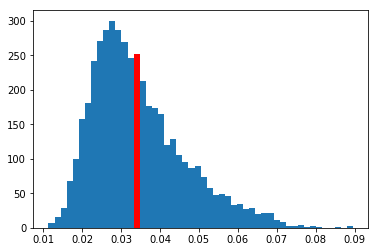

In [8]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(df['similarity'], bins=50)

similarity = float(comboSimilarity('Blonde Ale', 'German Pils')['similarity'])

# Find the histogram bin that holds the similarity between the two
target = np.argmax(bins>similarity)
patches[target].set_fc('r')
plt.show()